In [141]:
import pandas as pd
import numpy as np
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeClassifier 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from sklearn.model_selection import train_test_split

In [42]:
print("Question 11")

potHoleData=pd.read_csv('E:\Local Disk D\IIT-C\Sem 4\CS 584 Machine Learning\Mid-Term\ChicagoCompletedPotHole.csv')

potHoleDataFrame=pd.DataFrame(potHoleData)


Question 11


In [94]:
potHoleDataFrame.head(10)

,CASE_SEQUENCE,WARD,CREATION_MONTH,N_POTHOLES_FILLED_ON_BLOCK,N_DAYS_FOR_COMPLETION,LATITUDE,LONGITUDE
0,1,1,12,12,1,41.928307,-87.681971
1,2,18,12,17,1,41.763367,-87.700190
2,3,18,12,40,1,41.762503,-87.700460
3,4,5,12,37,1,41.795090,-87.586359
4,5,45,12,2,0,41.949208,-87.728091
5,6,18,12,1,0,41.750308,-87.675644
6,7,5,12,6,0,41.793175,-87.596645
7,8,5,12,12,0,41.791521,-87.599501
8,9,41,12,2,0,41.981281,-87.793888
9,10,5,12,7,0,41.795310,-87.589170


In [44]:
transformed_Pothole_filled=np.log(potHoleDataFrame['N_POTHOLES_FILLED_ON_BLOCK'])


print(transformed_Pothole_filled.head(10))



0    2.484907
1    2.833213
2    3.688879
3    3.610918
4    0.693147
5    0.000000
6    1.791759
7    2.484907
8    0.693147
9    1.945910
Name: N_POTHOLES_FILLED_ON_BLOCK, dtype: float64


In [45]:
transformed_N_days_Of_Completion=np.log(1+potHoleDataFrame['N_DAYS_FOR_COMPLETION'])

print(transformed_N_days_Of_Completion.head(10))

0    0.693147
1    0.693147
2    0.693147
3    0.693147
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: N_DAYS_FOR_COMPLETION, dtype: float64


In [46]:
combinedValues=potHoleDataFrame[['LATITUDE','LONGITUDE']]

inputVariables=np.column_stack((transformed_Pothole_filled,transformed_N_days_Of_Completion,combinedValues))
inputVariables=pd.DataFrame(inputVariables,
                           columns = ['Transformed_Pothole_filled','Transformed_NdaysOf_Completion', 'LATITUDE', 'LONGITUDE'])

print(inputVariables.head(10))

   Transformed_Pothole_filled  Transformed_NdaysOf_Completion   LATITUDE  \
0                    2.484907                        0.693147  41.928307   
1                    2.833213                        0.693147  41.763367   
2                    3.688879                        0.693147  41.762503   
3                    3.610918                        0.693147  41.795090   
4                    0.693147                        0.000000  41.949208   
5                    0.000000                        0.000000  41.750308   
6                    1.791759                        0.000000  41.793175   
7                    2.484907                        0.000000  41.791521   
8                    0.693147                        0.000000  41.981281   
9                    1.945910                        0.000000  41.795310   

   LONGITUDE  
0 -87.681971  
1 -87.700190  
2 -87.700460  
3 -87.586359  
4 -87.728091  
5 -87.675644  
6 -87.596645  
7 -87.599501  
8 -87.793888  
9 -87.589170 

In [49]:
noOfCluster=10
kmeans = cluster.KMeans(n_clusters=noOfCluster, random_state=20190327).fit(inputVariables)

print("Cluster Assignment: \n", kmeans.labels_,"\n")

for i in range(noOfCluster):
    print("Cluster Centroid ",i,":" "\n", kmeans.cluster_centers_[i],"\n")

Cluster Assignment: 
 [0 9 9 ... 6 6 7] 

Cluster Centroid  0 :
 [  2.35100832   0.12434838  41.82721171 -87.67978068] 

Cluster Centroid  1 :
 [  2.48371655   1.70792116  41.86343636 -87.69170243] 

Cluster Centroid  2 :
 [  0.18885894   2.39709356  41.86693353 -87.68503005] 

Cluster Centroid  3 :
 [  1.42971563   0.12200113  41.84016061 -87.68505063] 

Cluster Centroid  4 :
 [  0.29422108   0.19894845  41.84391097 -87.68056874] 

Cluster Centroid  5 :
 [  3.64217688   1.72819137  41.83632947 -87.68106072] 

Cluster Centroid  6 :
 [  1.74626348   2.87156263  41.86049036 -87.68478787] 

Cluster Centroid  7 :
 [  3.16056197   2.89776167  41.84062256 -87.67935286] 

Cluster Centroid  8 :
 [  1.24757098   1.67196978  41.86203262 -87.68270093] 

Cluster Centroid  9 :
 [  3.37477451   0.20870307  41.82422063 -87.68271529] 



In [50]:
noOfCluster=2
kmeans = cluster.KMeans(n_clusters=noOfCluster, random_state=20190327).fit(inputVariables)

print("Cluster Assignment: \n", kmeans.labels_,"\n")

for i in range(noOfCluster):
    print("Cluster Centroid ",i,":" "\n", kmeans.cluster_centers_[i],"\n")

Cluster Assignment: 
 [0 0 0 ... 1 1 1] 

Cluster Centroid  0 :
 [  1.79627091   0.2523933   41.83611619 -87.68254785] 

Cluster Centroid  1 :
 [  2.11106848   2.2918503   41.85624317 -87.68438743] 



In [53]:
combinedValues=potHoleDataFrame[['LATITUDE','LONGITUDE']]

inputVars=np.column_stack((transformed_Pothole_filled,transformed_N_days_Of_Completion,combinedValues))
inputVars=pd.DataFrame(inputVariables,
                           columns = ['Transformed_Pothole_filled','Transformed_NdaysOf_Completion', 'LATITUDE', 'LONGITUDE'])

inputVars=inputVars.as_matrix()

nClusters = np.zeros(10)
Elbow = np.zeros(10)
Silhouette = np.zeros(10)
# print(inputVars)
for c in range(10):
    KClusters = c + 1
    nClusters[c] = KClusters

    kmeans = cluster.KMeans(n_clusters=KClusters, random_state=20190327).fit(inputVars)
  
    if (1 < KClusters):
        Silhouette[c] = metrics.silhouette_score(inputVars, kmeans.labels_)
    else:
        Silhouette[c] = np.NaN

    WCSS = np.zeros(KClusters)
    nC = np.zeros(KClusters)

    for i in range(len(inputVars)):
        k = kmeans.labels_[i]
        nC[k] += 1
        diff = inputVars[i] - kmeans.cluster_centers_[k]
        WCSS[k] += diff.dot(diff)

    Elbow[c] = 0
    for k in range(KClusters):
        Elbow[c] += WCSS[k] / nC[k]
    print("Cluster Assignment: \n", kmeans.labels_)
    
    for k in range(KClusters):
        print("Cluster ", k)
        print("Centroid = ", kmeans.cluster_centers_[k])
        print("Size = ", nC[k])
        print("Within Sum of Squares = ", WCSS[k])
        print(" ")

Cluster Assignment: 
 [0 0 0 ... 0 0 0]
Cluster  0
Centroid =  [  1.94660468   1.22635015  41.84572797 -87.68342635]
Size =  17912.0
Within Sum of Squares =  47193.01770067438
 
Cluster Assignment: 
 [0 0 0 ... 1 1 1]
Cluster  0
Centroid =  [  1.79627091   0.2523933   41.83611619 -87.68254785]
Size =  9351.0
Within Sum of Squares =  13003.370311379573
 
Cluster  1
Centroid =  [  2.11106848   2.2918503   41.85624317 -87.68438743]
Size =  8561.0
Within Sum of Squares =  15156.702724461249
 
Cluster Assignment: 
 [1 1 1 ... 2 2 2]
Cluster  0
Centroid =  [  0.54690791   1.02193725  41.85192026 -87.68188878]
Size =  5157.0
Within Sum of Squares =  6751.320245126478
 
Cluster  1
Centroid =  [  2.48273111   0.23035849  41.83217867 -87.68314103]
Size =  6291.0
Within Sum of Squares =  4410.133750950755
 
Cluster  2
Centroid =  [  2.54150952   2.35876675  41.85397441 -87.68493072]
Size =  6464.0
Within Sum of Squares =  7085.110632293031
 
Cluster Assignment: 
 [3 3 3 ... 1 2 2]
Cluster  0
Cent

In [56]:
print("N Clusters\t Elbow Value\t Silhouette Value:")
for i in range(10):
    print('{:.0f} \t\t {:.3f} \t\t {:.3f}'
          .format(nClusters[i], Elbow[i], Silhouette[i]))

N Clusters	 Elbow Value	 Silhouette Value:
1 		 2.635 		 nan
2 		 3.161 		 0.394
3 		 3.106 		 0.397
4 		 2.719 		 0.412
5 		 2.905 		 0.386
6 		 2.844 		 0.365
7 		 2.830 		 0.384
8 		 2.886 		 0.373
9 		 2.933 		 0.376
10 		 2.900 		 0.372


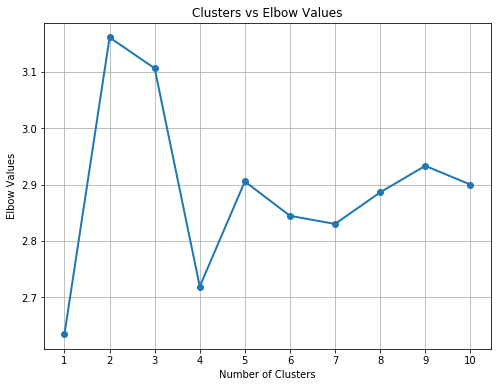

In [73]:
plt.figure(figsize=(8, 6))
plt.title("Clusters vs Elbow Values")
plt.plot(nClusters, Elbow, linewidth = 2, marker = 'o')
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Elbow Values")
plt.xticks(np.arange(1, 11, step = 1))
plt.show()

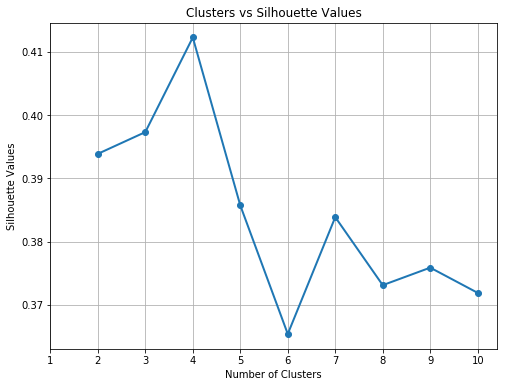

In [74]:
plt.figure(figsize=(8, 6))
plt.title("Clusters vs Silhouette Values")
plt.plot(nClusters, Silhouette, linewidth = 2, marker = 'o')
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Values")
plt.xticks(np.arange(1, 11, step = 1))
plt.show()  

In [63]:
print("Question 11(a)")

print("The number of clusters are 4")

Question 11(a)
The number of clusters are 4


Question 11(b)


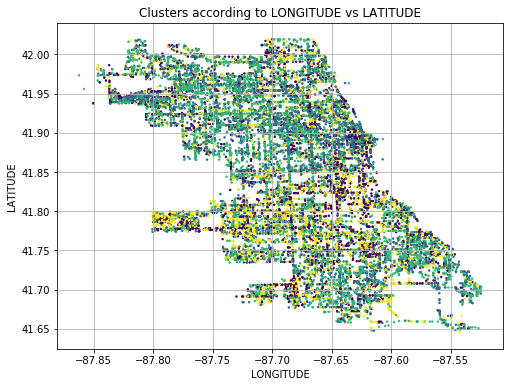

In [137]:
print("Question 11(b)")

x=potHoleDataFrame['LONGITUDE']
y=potHoleDataFrame['LATITUDE']

inputData=potHoleDataFrame[['LONGITUDE','LATITUDE']]


# kmeanModel = cluster.KMeans(n_clusters=4, random_state=20190327).fit(inputData)

plt.figure(figsize=(8, 6))
plt.title("Clusters according to LONGITUDE vs LATITUDE")
plt.scatter(x, y, c=kmeans.labels_.astype(float),s=2)
# plt.scatter(x, y, c=kmeanModel.labels_.astype(float),s=2)
plt.xlabel("LONGITUDE")
plt.ylabel("LATITUDE")
# plt.axes().set_aspect(1)
plt.grid()
plt.show()

In [116]:
inputVars_4=np.column_stack((transformed_Pothole_filled,transformed_N_days_Of_Completion,combinedValues))
inputVars_4=pd.DataFrame(inputVars_4,
                           columns = ['Transformed_Pothole_filled','Transformed_NdaysOf_Completion', 'LATITUDE', 'LONGITUDE'])

inputVars_4=inputVars_4.as_matrix()

nClusters = np.zeros(4)
Elbow = np.zeros(4)
Silhouette = np.zeros(4)
# print(inputVars)
for c in range(4):
    KClusters = c + 1
    nClusters[c] = KClusters

    kmeans = cluster.KMeans(n_clusters=KClusters, random_state=20190327).fit(inputVars)
  
    if (1 < KClusters):
        Silhouette[c] = metrics.silhouette_score(inputVars_4, kmeans.labels_)
    else:
        Silhouette[c] = np.NaN

    WCSS = np.zeros(KClusters)
    nC = np.zeros(KClusters)

    for i in range(len(inputVars_4)):
        k = kmeans.labels_[i]
        nC[k] += 1
        diff = inputVars_4[i] - kmeans.cluster_centers_[k]
        WCSS[k] += diff.dot(diff)

    Elbow[c] = 0
    for k in range(KClusters):
        Elbow[c] += WCSS[k] / nC[k]
    print("Cluster Assignment: \n", kmeans.labels_)
    
    for k in range(KClusters):
        print("Cluster ", k)
        print("Centroid = ", kmeans.cluster_centers_[k])
        print("Size = ", nC[k])
        print("Within Sum of Squares = ", WCSS[k])
        print(" ")

Cluster Assignment: 
 [0 0 0 ... 0 0 0]
Cluster  0
Centroid =  [  1.94660468   1.22635015  41.84572797 -87.68342635]
Size =  17912.0
Within Sum of Squares =  47193.01770067438
 
Cluster Assignment: 
 [0 0 0 ... 1 1 1]
Cluster  0
Centroid =  [  1.79627091   0.2523933   41.83611619 -87.68254785]
Size =  9351.0
Within Sum of Squares =  13003.370311379573
 
Cluster  1
Centroid =  [  2.11106848   2.2918503   41.85624317 -87.68438743]
Size =  8561.0
Within Sum of Squares =  15156.702724461249
 
Cluster Assignment: 
 [1 1 1 ... 2 2 2]
Cluster  0
Centroid =  [  0.54690791   1.02193725  41.85192026 -87.68188878]
Size =  5157.0
Within Sum of Squares =  6751.320245126478
 
Cluster  1
Centroid =  [  2.48273111   0.23035849  41.83217867 -87.68314103]
Size =  6291.0
Within Sum of Squares =  4410.133750950755
 
Cluster  2
Centroid =  [  2.54150952   2.35876675  41.85397441 -87.68493072]
Size =  6464.0
Within Sum of Squares =  7085.110632293031
 
Cluster Assignment: 
 [3 3 3 ... 1 2 2]
Cluster  0
Cent

Question 11(c)
Accuracy of Decision Tree classifier on training set: 1.000000


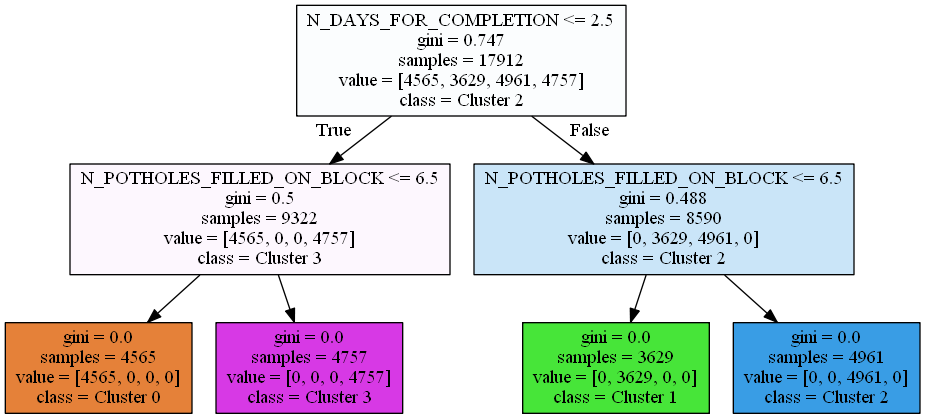

In [163]:
print("Question 11(c)")

trainData=potHoleDataFrame[['N_POTHOLES_FILLED_ON_BLOCK','N_DAYS_FOR_COMPLETION','LATITUDE','LONGITUDE' ]].dropna()


classTree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=20190327)

pothole_DT = classTree.fit(trainData, kmeans.labels_)
print('Accuracy of Decision Tree classifier on training set: {:.6f}' .format(classTree.score(trainData, kmeans.labels_)))

import graphviz
dot_data = export_graphviz(pothole_DT,out_file=None,impurity = True, filled = True,
                                feature_names = ['N_POTHOLES_FILLED_ON_BLOCK', 'N_DAYS_FOR_COMPLETION', 'LATITUDE','LONGITUDE'],
#                                 class_names = ['0','1','2','3'])
                                class_names = ['Cluster 0', 'Cluster 1','Cluster 2', 'Cluster 3'])
#                                 class_names = np.unique(kmeans.labels_).astype(np.str))

# graph = graphviz.Source(dot_data)
# graph

# graph.render('E:\Local Disk D\IIT-C\Sem 4\CS 584 Machine Learning\Mid-Term\pothole_out')


graph = pydotplus.graph_from_dot_data(dot_data)    

graph.write_png('E:\Local Disk D\IIT-C\Sem 4\CS 584 Machine Learning\Mid-Term\pothole_out.png')

Image(graph.create_png())

In [130]:
print("Question 11(c)")

print("Number of Leaves: 4")

Question 11(c)
Number of Leaves: 4


In [131]:
print("Question 11(d)")

print("Misclassification and RASE is 0")


Question 11(d)
Misclassification and RASE is 0


In [132]:
print("Question 11(e)")


print("All the clusters ")

Question 11(e)
All the clusters 


In [155]:
print("Question 12")

policyData=pd.read_csv('E:\Local Disk D\IIT-C\Sem 4\CS 584 Machine Learning\Mid-Term\policy_2001.csv')

policyDataFrame=pd.DataFrame(policyData)

noOfObservations=len(policyDataFrame)
print("Total Number of Observations: ",noOfObservations)

Question 12
Total Number of Observations:  617


In [140]:
policyDataFrame.head(20)

,ID,POLICYNO,BIRTH,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,CAR_AGE,TIF,OCCUPATION,PLCYYEAR,CLM_EXPOSURE,LN_CLM_EXPOSURE,CUST_LOYALTY,BLUEBOOK_1000
0,939401184,693420,20JAN71,2,13.0,NaN,Yes,$0,No,F,...,Sports Car,no,NaN,106,Blue Collar,2001,0.484932,-0.723748,4.008219,9.36
1,840809480,696991,29JUN72,3,12.0,"$56,048",No,"$137,836",Yes,M,...,Minivan,no,16.0,105,Lawyer,2001,1.000000,0.000000,6.021918,10.70
2,401200262,746346,23SEP60,0,NaN,NaN,No,"$252,896",Yes,M,...,Panel Truck,yes,10.0,104,Professional,2001,1.000000,0.000000,12.902358,28.56
3,926073051,748557,12OCT64,2,NaN,"$24,060",Yes,$0,No,M,...,Minivan,no,10.0,104,Clerical,2001,0.553425,-0.591630,3.997260,14.22
4,862203239,781399,20OCT74,0,8.0,"$14,194",No,"$87,034",No,F,...,Sports Car,no,10.0,103,Clerical,2001,0.252055,-1.378109,4.052055,2.92
5,601118153,1009383,26DEC68,0,11.0,"$33,727",No,$0,No,F,...,SUV,no,12.0,105,Clerical,2001,1.000000,0.000000,0.000000,10.85
6,808304017,1010844,30MAY59,0,0.0,$0,No,"$159,389",Yes,F,...,SUV,no,14.0,103,Professional,2001,1.000000,0.000000,9.994521,6.40
7,8565171,1175450,13OCT67,0,10.0,"$66,265",No,"$159,276",Yes,M,...,Minivan,yes,9.0,103,Lawyer,2001,0.742466,-0.297779,3.997260,12.23
8,765577228,1408765,08MAY53,0,15.0,"$108,152",No,"$329,756",Yes,F,...,SUV,no,15.0,106,Manager,2001,1.000000,0.000000,0.000000,12.32
9,394642738,1875285,28FEB69,1,16.0,"$12,054",No,$0,Yes,F,...,Pickup,no,1.0,103,Student,2001,0.098630,-2.316378,3.997260,15.76


In [142]:
policy_train, policy_test = train_test_split(policyDataFrame, test_size = 0.25, random_state = 20190402)


In [149]:
print("Question 12(a)")
policy_train



Question 12(a)


,ID,POLICYNO,BIRTH,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,CAR_AGE,TIF,OCCUPATION,PLCYYEAR,CLM_EXPOSURE,LN_CLM_EXPOSURE,CUST_LOYALTY,BLUEBOOK_1000
508,51967687,82489281,15JUN48,0,8.0,"$50,279",No,"$253,143",Yes,F,...,Minivan,no,12.0,107,Manager,2001,1.000000,0.000000,3.997260,12.53
371,590320189,60354168,16DEC48,0,9.0,"$98,537",No,NaN,Yes,M,...,Van,no,17.0,106,Manager,2001,1.000000,0.000000,18.134247,17.78
447,235120466,73412860,18AUG64,0,11.0,"$92,582",No,$0,No,F,...,SUV,no,11.0,105,Manager,2001,1.000000,0.000000,5.997260,15.16
463,219393180,75644058,01DEC69,0,13.0,"$126,747",No,"$311,195",Yes,F,...,Minivan,no,22.0,107,Professional,2001,1.000000,0.000000,10.991781,17.97
522,822635740,85042960,12OCT56,0,12.0,"$52,223",No,"$226,451",Yes,M,...,Van,no,10.0,107,Blue Collar,2001,1.000000,0.000000,9.994521,16.54
213,180789377,32584449,19NOV53,0,5.0,"$57,706",No,"$214,111",Yes,F,...,SUV,no,15.0,104,Manager,2001,1.000000,0.000000,0.032877,13.24
74,160730761,11442518,25OCT66,1,NaN,"$49,120",Yes,"$197,752",No,F,...,SUV,no,9.0,107,Manager,2001,0.698630,-0.358634,0.084924,10.44
1,840809480,696991,29JUN72,3,12.0,"$56,048",No,"$137,836",Yes,M,...,Minivan,no,16.0,105,Lawyer,2001,1.000000,0.000000,6.021918,10.70
581,140817281,95342876,07APR78,1,12.0,"$43,453",No,"$150,500",Yes,M,...,Pickup,yes,10.0,105,Clerical,2001,0.153425,-1.874546,8.106849,8.85
303,159215837,49927348,26OCT78,1,0.0,$0,Yes,"$76,283",No,F,...,Sports Car,no,1.0,106,Home Maker,2001,0.060274,-2.808855,5.997260,4.50


In [150]:
print("Question 12(a)")
policy_test

Question 12(a)


,ID,POLICYNO,BIRTH,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,CAR_AGE,TIF,OCCUPATION,PLCYYEAR,CLM_EXPOSURE,LN_CLM_EXPOSURE,CUST_LOYALTY,BLUEBOOK_1000
543,409263481,89382096,11MAY64,3,17.0,"$35,066",Yes,$0,No,F,...,SUV,no,1.0,107,Clerical,2001,0.813699,-0.206165,3.997260,18.88
593,438954064,97288342,15SEP76,2,11.0,"$59,905",Yes,"$197,120",No,M,...,Pickup,yes,1.0,103,Blue Collar,2001,0.131507,-2.028696,0.000000,8.62
362,946925740,58916022,15JUL63,2,16.0,"$101,470",No,"$321,990",Yes,F,...,SUV,no,11.0,103,Blue Collar,2001,0.583562,-0.538605,3.000000,11.84
395,590272679,64296732,06MAR81,0,8.0,NaN,No,$0,No,F,...,Minivan,no,4.0,102,Blue Collar,2001,1.000000,0.000000,6.158904,23.90
611,157332483,99452372,12FEB75,3,12.0,"$110,190",Yes,$0,No,M,...,Minivan,yes,13.0,107,Manager,2001,1.000000,0.000000,6.994521,12.52
13,968152368,2664505,22OCT59,0,0.0,$0,No,$0,No,F,...,Minivan,no,1.0,107,Home Maker,2001,1.000000,0.000000,6.994521,19.81
56,243138203,9064675,10APR62,0,8.0,"$132,767",No,"$348,409",Yes,M,...,Panel Truck,yes,9.0,106,NaN,2001,1.000000,0.000000,12.992050,23.91
332,937289055,54120460,13DEC68,0,11.0,"$15,430",No,"$134,172",No,F,...,SUV,no,1.0,105,Clerical,2001,1.000000,0.000000,8.992350,6.94
192,621052804,29701335,18NOV60,0,15.0,"$134,640",No,$0,No,F,...,SUV,no,23.0,107,Lawyer,2001,0.512329,-0.668789,4.005479,10.00
334,533351979,54492427,06AUG63,0,11.0,"$53,556",No,"$167,505",Yes,M,...,Van,yes,1.0,104,Blue Collar,2001,1.000000,0.000000,4.021918,19.05


In [156]:
print("Question 12(a)")


trainingObservation=len(policy_train)

print("Number of training Observations: ",trainingObservation)


testingObservation=len(policy_test)

print("Number of testing Observations: ",testingObservation)

Question 12(a)
Number of training Observations:  462
Number of testing Observations:  155


In [162]:
print("Question 12(b)")

# newcustomerData.CarOwnership.value_counts()[uniqueValue]

No_OFclaims_Filed=policy_train['CLAIM_FLAG'].value_counts()[1]

print("Number of Claims Filed: ",No_OFclaims_Filed)

claim_Rate=No_OFclaims_Filed/trainingObservation

print("Claim Rate for training data",round(claim_Rate,4))



Question 12(b)
Number of Claims Filed:  137
Claim Rate for training data 0.2965


In [ ]:
print("Question 12(c)")


